# Phase4

# Unsupervised ML (Clustering)

# 4.1] Create 3 Clusters:
    1.Sensitive Areas
    2.Moderate Areas
    3.Peaceful Areas


1]Sensitive area: where number of crimes is more.(highest number of crimes)
    state,district,total ipc crimes: 01_District_wise_crimes_committed_IPC_2001_2012.csv'.
    
2]Moderate Area: where number of crimes in medium not so high.
    state,district,total ipc crimes: 01_District_wise_crimes_committed_IPC_2001_2012.csv'.
    
3]Peaceful Areas: where lowest number of crimes.

file:
Districtwise_crimes.csv

In [49]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import seaborn as sns
import plotly.express as px

import matplotlib.pyplot as plt
import sqlite3
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:\\Users\\SNEHAL\\Downloads\\Capstone-Project-File\\01_District_wise_crimes_committed_IPC_2001_2012.csv')
df

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9013,LAKSHADWEEP,TOTAL,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9014,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,0,6,2,...,1,186,0,2,0,1,0,44,392,787
9015,PUDUCHERRY,PUDUCHERRY,2012,24,21,10,7,0,7,17,...,20,632,0,7,2,5,0,219,1668,3494


In [3]:
df.columns

Index(['STATE/UT', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES'],
      dtype='object')

In [5]:
# Remove rows where 'DISTRICT' column has the value 'TOTAL'
df1 = df[(df['DISTRICT'] != 'TOTAL') & (df['DISTRICT'] != 'DELHI UT TOTAL')]
df1

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9010,DELHI UT,STF,2012,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,6
9011,DELHI UT,WEST,2012,52,37,10,79,0,79,454,...,18,227,18,53,6,327,0,292,1144,5558
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9014,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,0,6,2,...,1,186,0,2,0,1,0,44,392,787


now in the 'district' column,there are no total and delhi ut total rows present.

In [6]:
# except 'total' values from District column
df1.to_csv('C:\\Users\\SNEHAL\\Downloads\\Capstone-Project-File\\Districtwise_crimes.csv',index=False)

Data of df1 sorted after above change.And below is the final file for further analysis.('Districtwise_crimes')

In [7]:
data = pd.read_csv('C:\\Users\\SNEHAL\\Downloads\\Capstone-Project-File\\Districtwise_crimes.csv')
data

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,DELHI UT,S.T.F.,2001,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,DELHI UT,S.T.F.,2002,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,HIMACHAL PRADESH,G.R.P.,2003,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,MANIPUR,CID,2009,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,MANIPUR,CID,2008,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8592,KARNATAKA,BANGALORE COMMR.,2009,256,338,1,65,0,65,270,...,8,2653,50,251,35,367,0,87,9992,32380
8593,MAHARASHTRA,MUMBAI COMMR.,2011,203,180,4,221,0,221,221,...,46,4302,14,553,162,393,0,656,6464,32647
8594,MAHARASHTRA,MUMBAI COMMR.,2008,210,132,0,218,0,218,189,...,22,4155,11,436,121,502,0,709,6850,32770
8595,MAHARASHTRA,MUMBAI COMMR.,2010,228,170,7,194,0,194,194,...,22,4487,21,475,138,312,0,690,7093,33932


we take all crime heads columns data with total ipc crimes.
now make cluster with same data.

In [8]:
data.dtypes

STATE/UT                                               object
DISTRICT                                               object
YEAR                                                    int64
MURDER                                                  int64
ATTEMPT TO MURDER                                       int64
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER               int64
RAPE                                                    int64
CUSTODIAL RAPE                                          int64
OTHER RAPE                                              int64
KIDNAPPING & ABDUCTION                                  int64
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS             int64
KIDNAPPING AND ABDUCTION OF OTHERS                      int64
DACOITY                                                 int64
PREPARATION AND ASSEMBLY FOR DACOITY                    int64
ROBBERY                                                 int64
BURGLARY                                                int64
THEFT   

In [9]:
data.shape

(8597, 33)

In [10]:
data.columns

Index(['STATE/UT', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES'],
      dtype='object')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8597 entries, 0 to 8596
Data columns (total 33 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   STATE/UT                                             8597 non-null   object
 1   DISTRICT                                             8597 non-null   object
 2   YEAR                                                 8597 non-null   int64 
 3   MURDER                                               8597 non-null   int64 
 4   ATTEMPT TO MURDER                                    8597 non-null   int64 
 5   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER            8597 non-null   int64 
 6   RAPE                                                 8597 non-null   int64 
 7   CUSTODIAL RAPE                                       8597 non-null   int64 
 8   OTHER RAPE                                           8597 non-null   int64 
 9

In [12]:
data.isnull().sum()

STATE/UT                                               0
DISTRICT                                               0
YEAR                                                   0
MURDER                                                 0
ATTEMPT TO MURDER                                      0
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER              0
RAPE                                                   0
CUSTODIAL RAPE                                         0
OTHER RAPE                                             0
KIDNAPPING & ABDUCTION                                 0
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS            0
KIDNAPPING AND ABDUCTION OF OTHERS                     0
DACOITY                                                0
PREPARATION AND ASSEMBLY FOR DACOITY                   0
ROBBERY                                                0
BURGLARY                                               0
THEFT                                                  0
AUTO THEFT                     

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
lab = LabelEncoder()
data['DISTRICT'] = lab.fit_transform(data['DISTRICT'])

In [15]:
x = data[['DISTRICT','TOTAL IPC CRIMES']]
x

,DISTRICT,TOTAL IPC CRIMES
0,638,0
1,638,0
2,239,1
3,158,1
4,158,2
...,...,...
8592,61,32380
8593,504,32647
8594,504,32770
8595,504,33932


In [16]:
from sklearn.cluster import KMeans


In [17]:
num = 3
# crete kmeans instance
kmean = KMeans(n_clusters=num,init='k-means++',random_state=42)
kmean.fit(x)


KMeans(n_clusters=3, random_state=42)

In [18]:
# training cluster

y= kmean.fit_predict(x)
y

array([0, 0, 0, ..., 2, 2, 2])

In [19]:
# add cluster column
data['CLUSTER']=y
data.head()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,CLUSTER
0,DELHI UT,638,2001,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,DELHI UT,638,2002,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,HIMACHAL PRADESH,239,2003,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,MANIPUR,158,2009,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,MANIPUR,158,2008,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0


In [20]:
kmean.cluster_centers_

array([[  401.63459638,  1392.14892916],
       [  419.28565419,  5388.92048801],
       [  274.63333333, 17872.30666667]])

In [34]:

# Map cluster labels to cluster names
cluster_names = {
    0: 'Peaceful Areas',
    1: 'Moderate Areas',
    2: 'Sensitive Areas'
}

In [35]:
data['CLUSTER NAME'] = data['CLUSTER'].map(cluster_names)


In [23]:
data.head()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,CLUSTER,CLUSTER NAME
0,DELHI UT,638,2001,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Peaceful Areas
1,DELHI UT,638,2002,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Peaceful Areas
2,HIMACHAL PRADESH,239,2003,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,Peaceful Areas
3,MANIPUR,158,2009,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,Peaceful Areas
4,MANIPUR,158,2008,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,Peaceful Areas


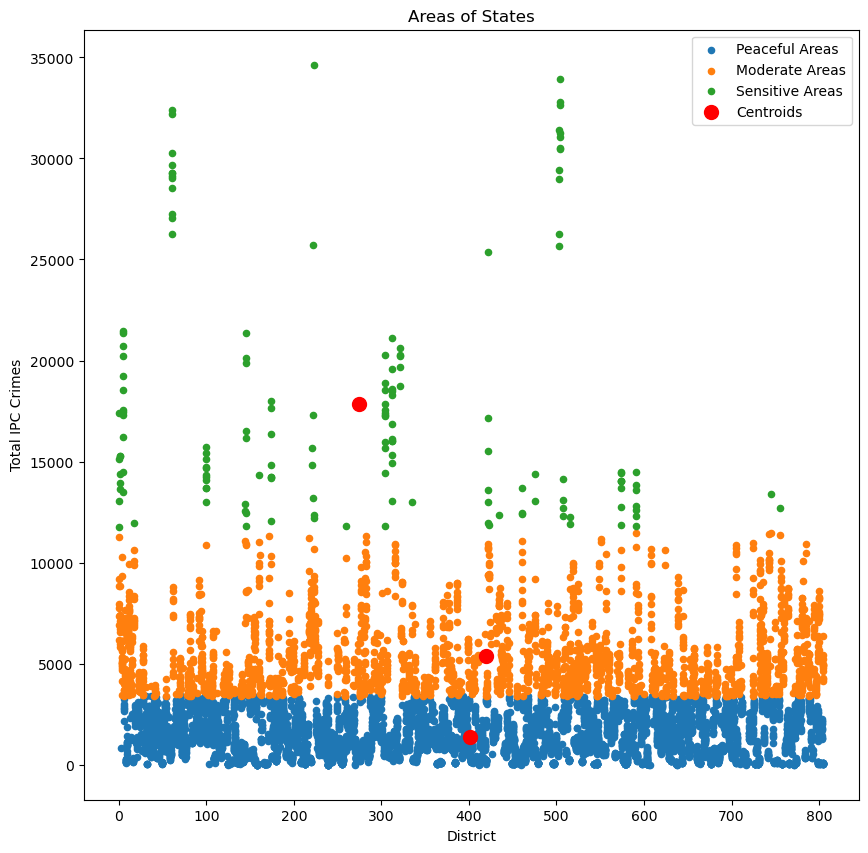

In [36]:
# Plot clusters
plt.figure(figsize=(10, 10))

# Scatter plot for each cluster
for i in range(num):
    plt.scatter(x[y == i]['DISTRICT'], x[y == i]['TOTAL IPC CRIMES'], s=20, label=f'{cluster_names[i]}')

# Plot centroids
plt.scatter(kmean.cluster_centers_[:, 0], kmean.cluster_centers_[:, 1], s=100, c='red', label='Centroids')

# Add labels and title
plt.title('Areas of States')
plt.xlabel('District')
plt.ylabel('Total IPC Crimes')
plt.legend()
plt.show()

# 4.2Create DataFrame for each cluster that shows data according to the areas.



In [26]:
# Save the encoded values before transforming
encoded_district_values = data['DISTRICT']

In [27]:
# Use inverse_transform to get back the original district values
decoded_district_values = lab.inverse_transform(encoded_district_values)


In [28]:
# Replace the encoded 'DISTRICT' column with the original values
data['DISTRICT'] = decoded_district_values

In [38]:
peaceful_area_df = data[data['CLUSTER'] == 0].copy()
moderate_area_df = data[data['CLUSTER'] == 1].copy()
sensitive_area_df = data[data['CLUSTER'] == 2].copy()

In [39]:
peaceful_area_df.to_csv('C:\\Users\\SNEHAL\\Downloads\\Capstone-Project-File\peaceful_area.csv', index=False)
moderate_area_df.to_csv('C:\\Users\\SNEHAL\\Downloads\\Capstone-Project-File\moderate_area.csv', index=False)
sensitive_area_df.to_csv('C:\\Users\\SNEHAL\\Downloads\\Capstone-Project-File\sensitive_area.csv', index=False)

In [40]:
peaceful_area_df.shape

(6064, 35)

In [41]:
moderate_area_df.shape

(2383, 35)

In [42]:
sensitive_area_df.shape

(150, 35)

# 4.3  "Analyse your clusters and prepare a report that explains all your observations.



1.What is impacting more crimes in sensitive areas. 
------------------------------


In [43]:
sensitive_df = pd.read_csv('C:\\Users\\SNEHAL\\Downloads\\Capstone-Project-File\sensitive_area.csv')
sensitive_df.head()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,CLUSTER,CLUSTER NAME
0,WEST BENGAL,24 PARGANAS NORTH,2012,140,108,80,118,0,118,497,...,74,196,1,1860,3,10,6062,11765,2,Sensitive Areas
1,MAHARASHTRA,PUNE COMMR.,2005,106,85,7,79,0,79,102,...,1,107,95,201,0,407,2418,11817,2,Sensitive Areas
2,UTTAR PRADESH,GHAZIABAD,2009,254,277,31,53,0,53,491,...,66,88,182,556,0,456,3123,11821,2,Sensitive Areas
3,TAMIL NADU,CHENNAI,2008,100,130,0,35,0,35,43,...,25,46,67,165,0,613,7478,11829,2,Sensitive Areas
4,ANDHRA PRADESH,HYDERABAD CITY,2001,111,113,7,37,0,37,80,...,24,118,27,746,0,409,1512,11831,2,Sensitive Areas


In [44]:
selected_col = sensitive_df[['STATE/UT', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
                                   'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS', 'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
                                   'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES',
                                   'CLUSTER', 'CLUSTER NAME']]

In [45]:
selected_col

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,RAPE,CUSTODIAL RAPE,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,CLUSTER,CLUSTER NAME
0,WEST BENGAL,24 PARGANAS NORTH,2012,140,108,118,0,338,3,10,6062,11765,2,Sensitive Areas
1,MAHARASHTRA,PUNE COMMR.,2005,106,85,79,0,72,0,407,2418,11817,2,Sensitive Areas
2,UTTAR PRADESH,GHAZIABAD,2009,254,277,53,0,321,0,456,3123,11821,2,Sensitive Areas
3,TAMIL NADU,CHENNAI,2008,100,130,35,0,32,0,613,7478,11829,2,Sensitive Areas
4,ANDHRA PRADESH,HYDERABAD CITY,2001,111,113,37,0,39,0,409,1512,11831,2,Sensitive Areas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,KARNATAKA,BANGALORE COMMR.,2009,256,338,65,0,2,0,87,9992,32380,2,Sensitive Areas
146,MAHARASHTRA,MUMBAI COMMR.,2011,203,180,221,0,166,0,656,6464,32647,2,Sensitive Areas
147,MAHARASHTRA,MUMBAI COMMR.,2008,210,132,218,0,116,0,709,6850,32770,2,Sensitive Areas
148,MAHARASHTRA,MUMBAI COMMR.,2010,228,170,194,0,146,0,690,7093,33932,2,Sensitive Areas


1.From above dataset we can see that the number of crimes increases year by year.
2.Population of each state increases year by year and number of crimes also increases.

In [46]:
selected_col.isnull().sum()

STATE/UT                                       0
DISTRICT                                       0
YEAR                                           0
MURDER                                         0
ATTEMPT TO MURDER                              0
RAPE                                           0
CUSTODIAL RAPE                                 0
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS    0
IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES    0
CAUSING DEATH BY NEGLIGENCE                    0
OTHER IPC CRIMES                               0
TOTAL IPC CRIMES                               0
CLUSTER                                        0
CLUSTER NAME                                   0
dtype: int64

In [47]:
selected_col.describe()

,YEAR,MURDER,ATTEMPT TO MURDER,RAPE,CUSTODIAL RAPE,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,CLUSTER
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.0
mean,2007.540000,143.346667,142.066667,97.313333,0.006667,113.600000,0.300000,416.193333,7205.913333,17872.306667,2.0
std,3.467258,83.420016,115.611689,86.996963,0.081650,111.947315,1.097587,333.330694,3967.660667,6146.595588,0.0
min,2001.000000,4.000000,2.000000,12.000000,0.000000,2.000000,0.000000,0.000000,1397.000000,11765.000000,2.0
25%,2005.000000,85.000000,76.250000,46.000000,0.000000,38.250000,0.000000,158.250000,4684.000000,13605.250000,2.0
50%,2008.000000,122.500000,116.000000,69.000000,0.000000,75.500000,0.000000,408.000000,7270.000000,15475.000000,2.0
75%,2010.750000,212.750000,160.000000,105.500000,0.000000,146.000000,0.000000,565.000000,9171.000000,20065.500000,2.0
max,2012.000000,436.000000,637.000000,568.000000,1.000000,492.000000,9.000000,1431.000000,32452.000000,34638.000000,2.0


sensitive areas where total number of crimes above 11,000.

# 2. What needs to be done to reduce crime. 

FOLLOWING ARE SOME RECOMENDATION TO REDUCE CRIME IN ALL AREAS OF STATE
---------------------------------------------------------------------------------
1]Awareness campaigns and preventive measures should be implemented for 
specific crime categories showing concerning trends.
2]Further investigation is needed to understand the factors contributing 
to the fluctuations in crime rates.
3]Implement targeted interventions for specific 
crime categories showing consistent increases.
4]Enhance community engagement and awareness programs to prevent 
crimes like dowry deaths and assault on women.
5]Collaborate with law enforcement agencies to develop strategies for 
reducing attempted murders and other violent crimes.
6]Collaborate with relevant authorities to develop targeted interventions 
based on the insights provided by the data.
7]Strengthen law enforcement measures to address specific 
crime categories showing consistent increases.
8]Establish a system for continuous monitoring and 
analysis of crime data for proactive interventions.
9]Collaborate with non-governmental organizations(NGOs) to 
address the root causes of specific crimes.
10]Collaborate with social organizations to address underlying
 issues contributing to certain crimes.
11]Launch community engagement initiatives to enhance public 
awareness and participation in crime prevention.


# 3. Most safe and unsafe districts.

Most safe Districts
--------------------------

In [48]:
peaceful_df = pd.read_csv('C:\\Users\\SNEHAL\\Downloads\\Capstone-Project-File\\peaceful_area.csv')
peaceful_df

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,CLUSTER,CLUSTER NAME
0,DELHI UT,S.T.F.,2001,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Peaceful Areas
1,DELHI UT,S.T.F.,2002,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Peaceful Areas
2,HIMACHAL PRADESH,G.R.P.,2003,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,Peaceful Areas
3,MANIPUR,CID,2009,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,Peaceful Areas
4,MANIPUR,CID,2008,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,Peaceful Areas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6059,TAMIL NADU,MADURAI URBAN,2005,21,40,0,5,0,5,20,...,3,28,29,43,0,112,2075,3384,0,Peaceful Areas
6060,BIHAR,BEGUSARAI,2009,109,237,1,12,0,12,79,...,46,10,0,47,2,234,1386,3387,0,Peaceful Areas
6061,BIHAR,DARBHANGA,2007,72,109,5,47,0,47,91,...,39,41,0,59,0,84,2012,3388,0,Peaceful Areas
6062,MADHYA PRADESH,SIHORE,2001,35,54,1,59,0,59,29,...,5,130,17,45,0,68,1755,3389,0,Peaceful Areas


In [53]:
top_20_districts = peaceful_df.nsmallest(20, 'TOTAL IPC CRIMES')

In [54]:
fig = px.bar(top_20_districts, x="DISTRICT", y="TOTAL IPC CRIMES", color_discrete_sequence=["blue"], title="Most Safe District")
fig.update_layout(xaxis_title = "District",
                  yaxis_title = "Crimes")
fig.layout.template ="plotly_dark"
fig.show()

1]there are some police force areas also included in dataframe
2]if we see the peaceful areas where number of crimes are very low these are considerd to be most safe areas.
3]Like districts 'phek' in nagaland,'tawang' in arunachal pradesh,'colasib' in mizoram.

Most Unsafe Districts
------------------------------

In [60]:
unsafe=sensitive_df.tail(10)

In [62]:
unsafe

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,CLUSTER,CLUSTER NAME
140,MAHARASHTRA,MUMBAI COMMR.,2012,215,170,9,232,0,232,212,...,11,614,235,388,0,621,6423,30508,2,Sensitive Areas
141,MAHARASHTRA,MUMBAI COMMR.,2006,239,135,5,165,0,165,190,...,17,357,102,327,1,778,7138,31070,2,Sensitive Areas
142,MAHARASHTRA,MUMBAI COMMR.,2009,217,160,6,182,0,182,149,...,15,400,101,434,0,710,6738,31262,2,Sensitive Areas
143,MAHARASHTRA,MUMBAI,2005,212,136,8,201,0,201,198,...,9,385,99,336,0,658,7275,31432,2,Sensitive Areas
144,KARNATAKA,BANGALORE COMMR.,2010,266,445,5,65,0,65,513,...,52,308,50,398,0,104,10333,32188,2,Sensitive Areas
145,KARNATAKA,BANGALORE COMMR.,2009,256,338,1,65,0,65,270,...,50,251,35,367,0,87,9992,32380,2,Sensitive Areas
146,MAHARASHTRA,MUMBAI COMMR.,2011,203,180,4,221,0,221,221,...,14,553,162,393,0,656,6464,32647,2,Sensitive Areas
147,MAHARASHTRA,MUMBAI COMMR.,2008,210,132,0,218,0,218,189,...,11,436,121,502,0,709,6850,32770,2,Sensitive Areas
148,MAHARASHTRA,MUMBAI COMMR.,2010,228,170,7,194,0,194,194,...,21,475,138,312,0,690,7093,33932,2,Sensitive Areas
149,KERALA,ERNAKULAM RURAL,2011,15,14,0,30,0,30,12,...,0,105,32,136,0,2,32452,34638,2,Sensitive Areas


In [61]:
fig = px.bar(unsafe, x="TOTAL IPC CRIMES", y='DISTRICT',color_discrete_sequence=["blue"], title="Most unsafe District")
fig.update_layout(xaxis_title = "Crimes",
                  yaxis_title = "District")
fig.layout.template ="plotly_dark"
fig.show()

kerala sate ernakulum district find to be most unsafe in 2011 year,mumbai,bangalore,chennai are the most unsafe districts over the year.

# 4.4 Capstone project overall story in your own words. Min 1000 words.

Phase1:
-----------------
1]Requirements:

The population of each state.
Literacy Rate in each state
Area of each state
Collect any other data that helps with your analysis. There is no limitation for anything.
Create a new file and keep the above-collected data.
2]first i go through this requirements and collect data as per that.
collect data from Sites:
        1.Open Government Data(https://data.gov.in/search)
        2.https://www.arcgis.com/home/item.html?id=443e1ef30cfb49bb93f15ccb56195a10#data
3]download this files:
        1.population_of_India-2001-2011.csv
        2.StatWise-Literacy_Rates_(1951-2011).csv
        3.Statewise_Crime(2001&2011).csv
        4.statewise_crime_crimerate 2001.csv
        5.Statewise_crime_crimerate 2011.csv
        6.StatWise-Literacy_Rates_(1951-2011).csv
        7.01_District_wise_crimes_committed_IPC_2001_2012.csv
Analysis of population according to census 2011, i took population every state from year 2001 to 2011. Then I performed comparison between population across the years. I observed from the datasets, you can find total number of crimes and literacy rate in the below observation:
1.'2011' has the highest correlation with 'Total_Crime2011' (0.836045) and 'Total_Crime2001' (0.832963), indicating a strong positive relationship with both years' total crime numbers. 
2.'2011' has weaker correlations with 'lr_2001' (-0.024591) and 'Total_Crime2001' (0.999025). 
3.Both literacy rates ('lr_2001' and 'lr_2011') have weaker correlations with other features, particularly with crime-related variables. 
4.'Total_CrimeRate2001' shows a moderate positive correlation with 'Total_Crime2001' (0.225639) and 'Total_Crime2011' (0.185811). 
5.'Total_Crime2011' has the highest correlation with 'Total_Crime2001' (0.974960) and '2011' (0.836045), indicating strong positive relationships with the total crime numbers in both years and the population in 2011.

Phase2:
----------------
Requirements:
2.1	Analysis of Literacy Rate vs Total Crimes
Literacy Rate state wise upto 2011.csv 
        Reference files:
state wise total crime2001.csv 
      *state wise total crime20011.csv 
      *state wise total crimes1991.csv 
      
we analyse columns from dataset :(\literacyRate statewise upto 2011.xls)     
1.total number of crimes during 2001 and Average literacy rate in 2001 . 2.Above plot showing the relationship between the both features as mentioned. 3.it displaying the data points areseperate from linear trendline,it means there is weaker correlation between two features.
4.Literacy between male and female in every year in every state.
5.crimes are less where average literacy rate is high.
In some states has literacy rate is 63,51,75 there number of crimes are high.
6.literacy rate high with lower number of crimes in lakshadweep,goa,diu daman,tripura.

      
2.2 Analysis of the type of crime vs each state vs Literacy rate.
    ref file:
    Statewise_Crime(2001&2011).csv 
    
1.column name '2001','2011'  showing population of each state in that year.
2.lr_2001,lr_2011 showing literacy rate in 2001 and 2011. 
3.data collected according to 2001,2011 census.
here we compare crime rate and literacy rate in each state.
4.drow pie charts so that we can analyze year wise the crime rate of each state.
5 i observe that In 2001 having highest  literacy rate in Kerala and lowest literacy rate in himachal pradesh.

    
2.3:Analysis of year-on-year total crime rate.
	Calculate crime rate of every year
    
1.I have population and total ipc crime data
so from that we can calculate crime rate of each year.

formula:crime_rate = (total_ipc_crimes / population) * 1000
with this formula we calculate crime rate.
I took same file data but add only one column with crime rate and create new file .(YearOnYear_CrimeRate.csv)
2.crime rate of each state in over every year(2001-2011)
3.Analyzed crime heads of according to the crime rate of each state. 
4 last checked correlation with features.

2.4:Analysis of area vs overall crime.
	01_District_wise_crimes_committed_IPC_2001_2012.csv
    Getting Idea from https://www.kaggle.com/datasets.
1.state and district wise overall crimes 
2.In this dataset head of crimes are mentioned with total count in every year (2001 to 2012)
3.district wise number of crimes happed in every year.
4.But we have to analyze data state wise not District wise.
5.Here we can see data state wise also district wise.
6.We consider District as Area of state where crimes had done and get count of crimes.
7.For doing visualizations we are creating a dataframe with State name and total number of cases on that state.
8.here i analyze crime heads with reported cases in each state.
9.i took only some of state to analyze number of reported cases in every year.
10.analyzed total number of cases reported all over india in every year.(2001-2012)


2.5:Analysis of Population vs overall Crime.

1]source:01_District_wise_crimes_committed_IPC_2001_2012.csv
2]create new file with source file data with adding population column data.
3]created file: statewise_PopulationOverallCrimes.csv
4]Visualize statewise overall crimes and population over year(2001-2011).
5]population getting increase over year. 
reported number of crimes getting high in number .
in 2011 total reported ipc crimes are more than previous years.
6]Analyzed population, year,and total ipc crimes with crime heads.
 
2.6.Each State Crime Report. 
I create report in seperate file.
filename:ds-capstoneProject-phase2(Report)
       
Phase3
-----------
Note: Create a separate table for each file and give a meaningful name.

When you are inserting make sure you are NOT inserting the column name in the table, else you don’t get a result.

3.1	Insert records from 42_District_wise_crimes_committed_against_women_2001_2012.csv into a table.

3.2	Write SQL query to find the highest number of rapes & Kidnappings that happened in which state, District, and year

3.3	Write SQL query to find All the lowest number of rapes & Kidnappings that happened in which state, District, and year

3.4	Insert records from 02_District_wise_crimes_committed_against_ST_2001_2012.csv into a new table

3.5	Write SQL query to find the highest number of dacoity/robbery in which district.

3.6	Write SQL query to find in which districts(All) the lowest number of murders happened

3.7	Write SQL query to find the number of murders in ascending order in district and yearwise.


3.8.1	Insert records of STATE/UT, DISTRICT, YEAR, MURDER, ATTEMPT TO MURDER, and RAPE columns only from 01_District_wise_crimes_committed_IPC_2001_2012.csv into a new table


3.8.2	Write SQL query to find which District in each state/ut has the highest number of murders yearwise. Your output should show STATE/UT, YEAR, DISTRICT, and MURDERS.

1]i completed this phase with sqlite3 .
2]create dataframe and complete query according to requirements.
3]Last analyzed crime heads by year and districts.

Phase4
--------------------
1.In this Phase i have create cluster named sensitive areas,moderate areas,peaceful areas.
2.
1]Sensitive area: where number of crimes is more.(highest number of crimes)
    state,district,total ipc crimes: 01_District_wise_crimes_committed_IPC_2001_2012.csv'.
    
2]Moderate Area: where number of crimes in medium not so high.
    state,district,total ipc crimes: 01_District_wise_crimes_committed_IPC_2001_2012.csv'.
    
3]Peaceful Areas: where lowest number of crimes.

file:
*Districtwise_crimes.csv
*removed rows which has district value 'total' and 'delhi ut total'
*create file name: Districtwise_crimes.csv
*apply kmeans algorithm and create clusters
*then create dataframe of each cluster and create csv file as well with cluster name.
*Did some analyze with cluster data.